# Reinforcement Learning 'Enjoy' Metrics Dashboard

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("~/dev/harvard/gym-duckietown/learning/metrics-reinforcement-enjoy.csv")
data.head()

,datetime,step,x,y,angle,speed,steering,center_dist,center_angle,reward,total_reward
0,2019-11-12 19:17:24.517544,1,2.582731,1.031113,4.552048,0.664538,0.988904,-0.054907,-0.045813,-14.570656,-14.570656
1,2019-11-12 19:17:25.207518,2,2.581239,1.047012,4.685694,0.229138,0.569936,-0.056423,-0.143207,-18.285578,-32.856234
2,2019-11-12 19:17:25.290064,3,2.582483,1.075415,4.826620,0.531641,0.891001,-0.061780,-0.236764,-15.337839,-48.194073
3,2019-11-12 19:17:25.373701,4,2.587961,1.111059,4.903115,0.804250,0.999315,-0.070567,-0.258879,-15.315085,-63.509158
4,2019-11-12 19:17:25.440001,5,2.596351,1.142938,5.036385,0.654821,0.994660,-0.080473,-0.351877,-21.095117,-84.604275


In [3]:
data.tail()

,datetime,step,x,y,angle,speed,steering,center_dist,center_angle,reward,total_reward
2110,2019-11-12 19:19:46.174521,2111,1.213495,1.158100,2.858347,0.697349,0.997928,-0.365904,-1.269817,-42.080374,-44832.639423
2111,2019-11-12 19:19:46.238927,2112,1.180003,1.150193,2.961151,0.729624,0.991773,-0.389620,0.166015,-20.698206,-44853.337629
2112,2019-11-12 19:19:46.306423,2113,1.168022,1.147101,2.816894,0.493538,0.125683,-0.386599,0.326266,-22.130476,-44875.468106
2113,2019-11-12 19:19:46.372545,2114,1.147871,1.140364,2.821017,0.525919,0.536431,-0.379492,0.355414,-27.028496,-44902.496602
2114,2019-11-12 19:19:46.442972,2115,1.131067,1.134707,2.812702,0.453863,0.432660,-0.369579,1.839230,-60.254768,-44962.751370


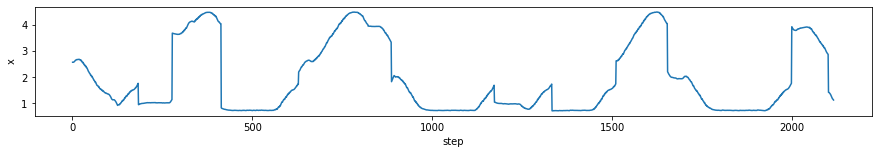

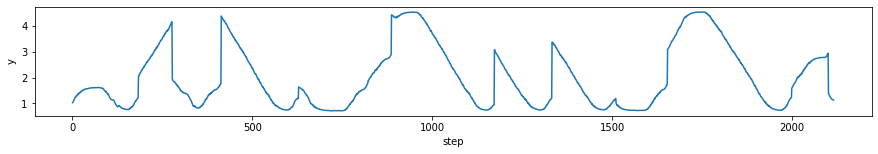

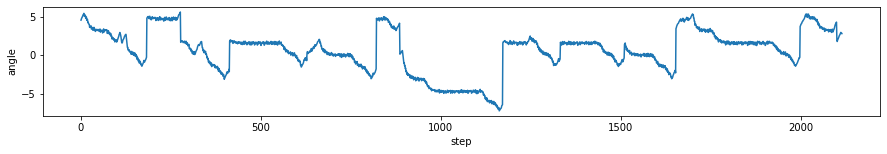

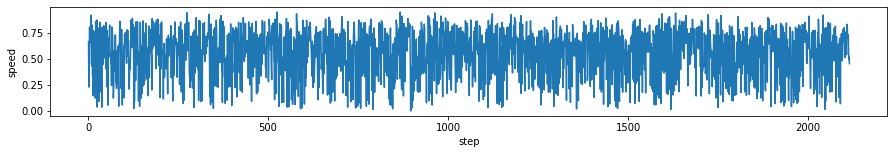

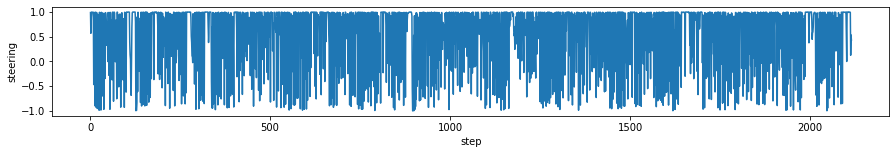

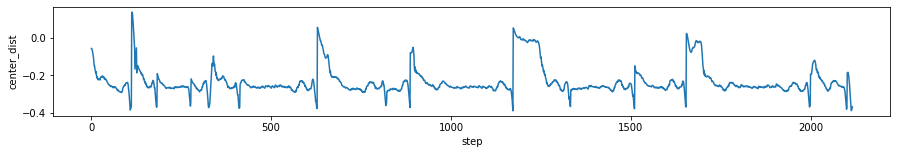

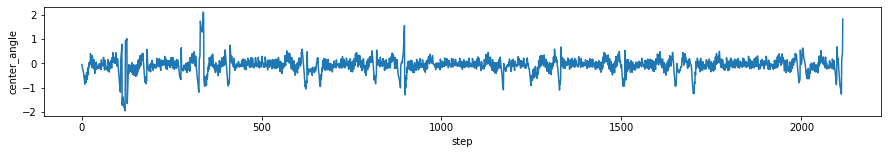

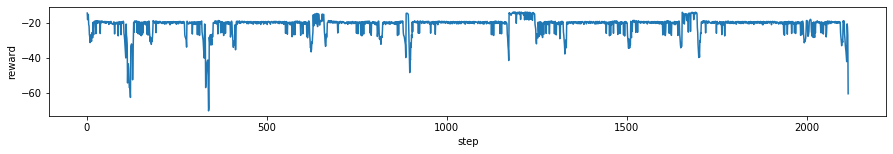

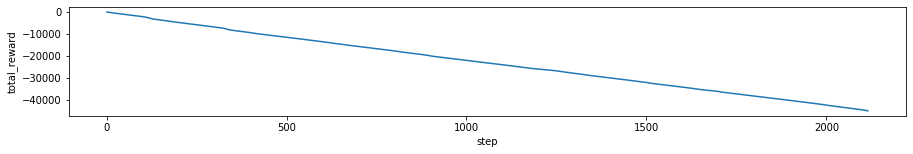

In [4]:
fields=['x', 'y', 'angle', 'speed', 'steering', 'center_dist', 'center_angle','reward', 'total_reward']

for field in fields:
    plt.figure(figsize=(15, 2))
    sns.lineplot(x='step',y=field, data=data)
    plt.show()
    


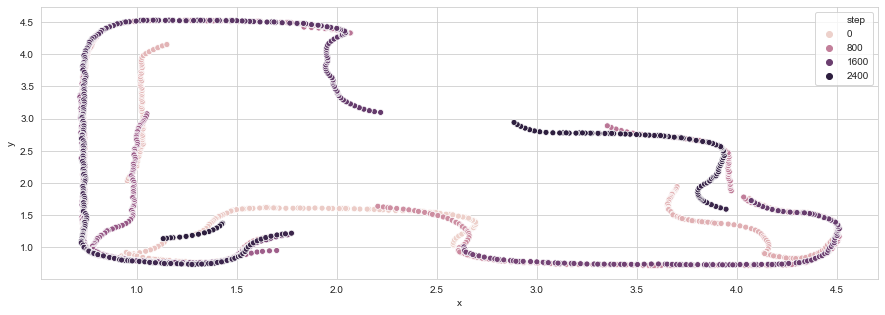

In [5]:
#x y driving history looks pretty good
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
sns.scatterplot(x="x", y="y", hue='step', data=data)

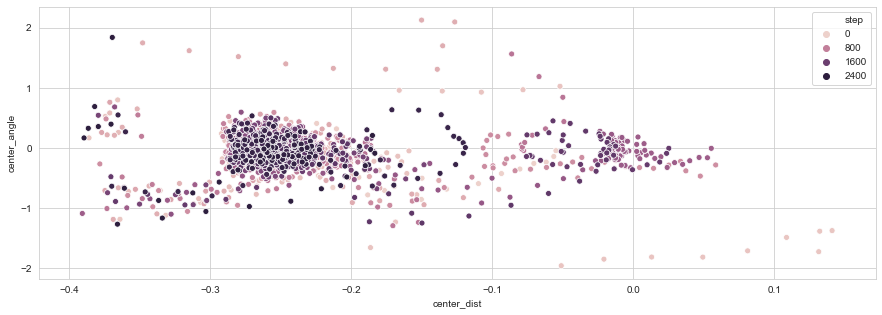

In [6]:
# Here we discover the bot is british and loves to drive on the wrong side of the road
# Expected Center angle is clustered around 0
# Actual   Center angle is clustered around 0 !
# Expected Center distance is clustered around 0
# Actual   Center distance is clustered around -0.25 ??
plt.figure(figsize=(15, 5))
sns.scatterplot(x="center_dist", y="center_angle", hue='step', data=data)

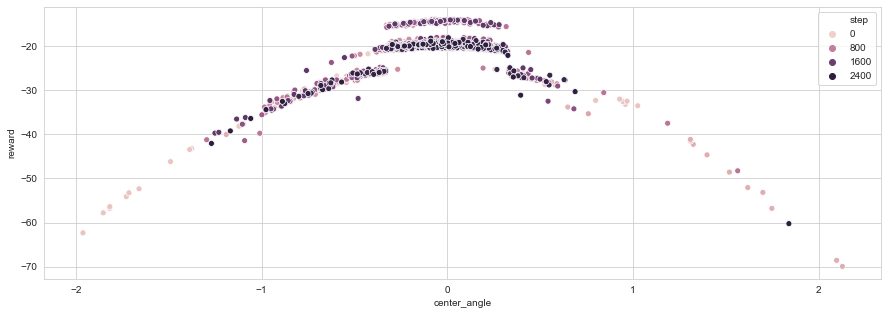

In [7]:
# Expected: Reward function should peak at 0 angle and drop off as we diverge from 0
# Actual:   Reward function peaks at 0 angle and drops off as we diverge from 0 !
plt.figure(figsize=(15, 5))
sns.scatterplot(x="center_angle", y="reward", hue='step', data=data)

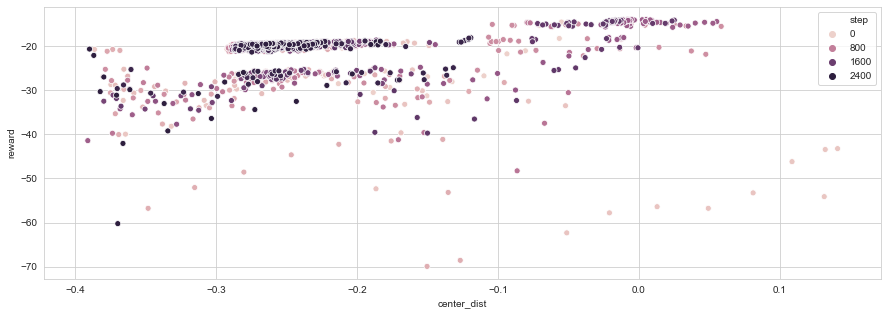

In [8]:
# Expected: Reward function should peak at 0 distance and drop off as we diverge from 0
# Actual:   Reward function does a poor job of rewarding driving in the middle of the lane
# Fix performed: The reward function was updated to clearly reward driving in the center of the lane
plt.figure(figsize=(15, 5))
sns.scatterplot(x="center_dist", y="reward", hue='step', data=data)